In [ ]:
import torch
import requests
import matplotlib.pyplot as plt
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)
with open('iris.data', 'wb')as f:
  f.write(r.content)

In [ ]:
vectors= []
answers = []

with open("iris.data","r")as f:
  for line in f:
    try:
      items = line.strip().split(",")
      vectors.append([float(i) for i in items[0:4]])
      answers.append(items[4])
    except:
      pass

species = {a: i for i, a in enumerate(set(answers))}
species





{'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 0}

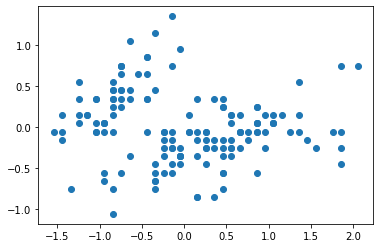

In [ ]:
import numpy as np

x = torch.tensor(vectors)
z = x-x.mean(axis = 0)


#x[:,0]= x[:,0]- x[:,0].mean()
#x[:,1]= x[:,1]- x[:,1].mean()
#x[:,2]= x[:,2]- x[:,2].mean()
#x[:,3]= x[:,3]- x[:,3].mean()

plt.scatter(z[:,0],z[:,1])
plt.show()



In [ ]:
def findPC(z):
  dim = z.shape[1]
  w = torch.randn(dim)
  w/=((w * w).sum()**0.5)

  lr = 0.1

  for epoch in range(1001):
    w.requires_grad_(True)
    variance = ((z*w).sum(dim=1)**2).mean()

    variance.backward()
    with torch.no_grad():
      w = w+lr *w.grad
      w/=((w * w).sum()**0.5)

  
  return w,variance.item()

findPC(z)


      





(tensor([ 0.3616, -0.0823,  0.8566,  0.3588]), 4.196675777435303)

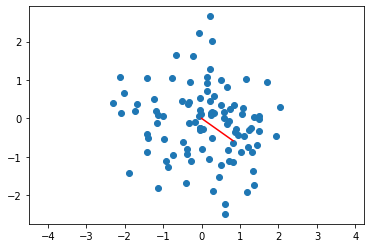

In [ ]:
a = torch.randn(100,2)

w,v = findPC(a)

plt.scatter(a[:,0],a[:,1])
plt.plot([0,w[0]],[0,w[1]],c='red')
plt.axis('equal')
plt.show()



In [ ]:
def PCA(z,n):
  W = []
  V = []

  for _ in range(n):
    w, v = findPC(z)
    W.append(w)
    V.append(v)
    z = z-(z@w.view(-1,1)) * w

  return W,V


In [ ]:
W,V = PCA(z,4)

print(W)
print(V)

[tensor([-0.3616,  0.0823, -0.8566, -0.3588]), tensor([-0.6565, -0.7297,  0.1758,  0.0747]), tensor([-0.5809,  0.5963,  0.0724,  0.5493]), tensor([ 0.2942, -0.3206, -0.4733,  0.7660])]
[4.196675777435303, 0.24062858521938324, 0.07800041139125824, 0.023505669087171555]


In [ ]:
def transform(Z, W):
 return Z @ torch.stack(W).T

In [ ]:
W, V = PCA(z, 4)
K = transform(z, W)

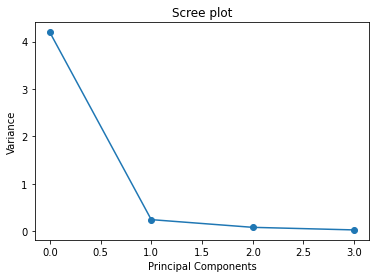

In [ ]:
plt.title("Scree plot")
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.plot(range(4), V, "o-")
plt.show()

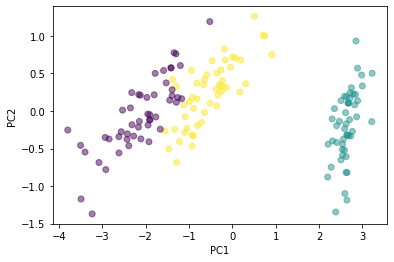

In [ ]:
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(K[:,0], K[:,1], c=[species[a] for a in answers], alpha=0.5)
plt.show()